<a href="https://colab.research.google.com/github/ishnt/Data_science_stuff/blob/main/Support_Vector_Regressor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [4]:
x,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

<Axes: xlabel='0', ylabel='1'>

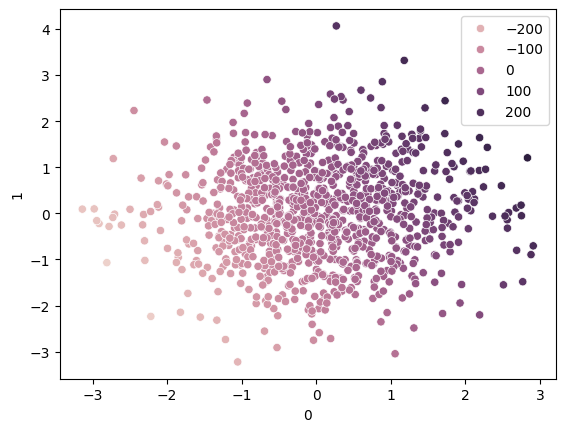

In [6]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [8]:
from sklearn.svm import SVR

In [9]:
svr=SVR(kernel='linear')

In [10]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [12]:
y_pred=svr.predict(x_test)

In [13]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9990127172700951


In [14]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [16]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [17]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.795 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.798 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.809 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.794 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.800 total time=   0.1s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.795 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.798 total time=   0.1s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.809 total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [18]:
grid.best_params_

{'C': 1000, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [19]:
grid.best_score_

0.9989555446004885

In [20]:
svr=SVR(C= 1000, epsilon= 0.3, gamma= 1, kernel= 'linear')

In [21]:
svr.fit(x_train,y_train)

SVR(C=1000, epsilon=0.3, gamma=1, kernel='linear')

In [23]:
y_pred=svr.predict(x_test)

In [24]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.999017037195962
